# Feature Selection and PCA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [32]:
# Sample DataFrame
data = {
    'age': [25, 30, 45, 35, 23, 40, 50, 60],
    'income': [50000, 60000, 80000, 75000, 52000, 90000, 120000, 150000],
    'purchases': [5, 7, 8, 6, 5, 9, 12, 15],
    'gender': ['F', 'M', 'M', 'F', 'F', 'M', 'M', 'F'],
    'membership': ['Silver', 'Gold', 'Gold', 'Silver', 'Silver', 'Gold', 'Gold', 'Silver']
}

df = pd.DataFrame(data)
df

,age,income,purchases,gender,membership
0,25,50000,5,F,Silver
1,30,60000,7,M,Gold
2,45,80000,8,M,Gold
3,35,75000,6,F,Silver
4,23,52000,5,F,Silver
5,40,90000,9,M,Gold
6,50,120000,12,M,Gold
7,60,150000,15,F,Silver


In [51]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['gender', 'membership']
encoder = LabelEncoder()
for cat in categorical_columns:
    df[cat] = encoder.fit_transform(df[cat])
df

,age,income,purchases,gender,membership
0,25,50000,5,0,1
1,30,60000,7,1,0
2,45,80000,8,1,0
3,35,75000,6,0,1
4,23,52000,5,0,1
5,40,90000,9,1,0
6,50,120000,12,1,0
7,60,150000,15,0,1


Correlation matrix:
                 age    income  purchases    gender  membership
age         1.000000  0.961156   0.946934  0.229766   -0.229766
income      0.961156  1.000000   0.981466  0.088005   -0.088005
purchases   0.946934  0.981466   1.000000  0.188579   -0.188579
gender      0.229766  0.088005   0.188579  1.000000   -1.000000
membership -0.229766 -0.088005  -0.188579 -1.000000    1.000000


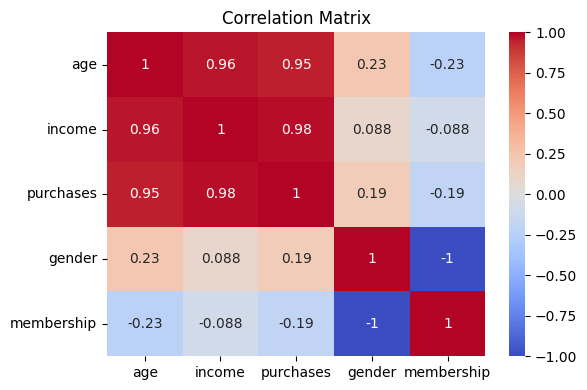

In [55]:
# ===========================================
# Pearson Correlation between numeric columns
# ===========================================
correlation_matrix = df.corr(numeric_only=True)
print("Correlation matrix:")
print(correlation_matrix)

# Optional: heatmap visualization
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [56]:

# ===========================================
# Chi-squared test of independence
# Example: gender vs membership
# ===========================================
contingency_table = pd.crosstab(df['gender'], df['membership'])
print("\nContingency Table (gender vs membership):")
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-squared Test Results:")
print(f"Chi2 Statistic = {chi2:.4f}")
print(f"Degrees of Freedom = {dof}")
print(f"P-value = {p:.4f}")
print("Expected Frequencies:")
print(expected)



Contingency Table (gender vs membership):
membership  0  1
gender          
0           0  4
1           4  0

Chi-squared Test Results:
Chi2 Statistic = 4.5000
Degrees of Freedom = 1
P-value = 0.0339
Expected Frequencies:
[[2. 2.]
 [2. 2.]]


In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [ ]:
# Example DataFrame
df = pd.DataFrame({
    'gender': ['Male', 'Female', 'Female', 'Male'],
    'membership': ['Gold', 'Silver', 'Gold', 'Bronze'],
    'age': [25, 35, 45, 30],
    'income': [50000, 60000, 55000, 52000]
})

# Encode categorical columns
categorical_columns = ['gender', 'membership']
encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

# Prepare features for PCA (all numeric now)
X = df.values

# Apply PCA
# For example, reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame with PCA results
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

print(df_pca)


           PC1        PC2
0 -4250.006956  -4.173884
1  5749.998103  -4.961568
2   750.011750  10.448204
3 -2250.002898  -1.312752
